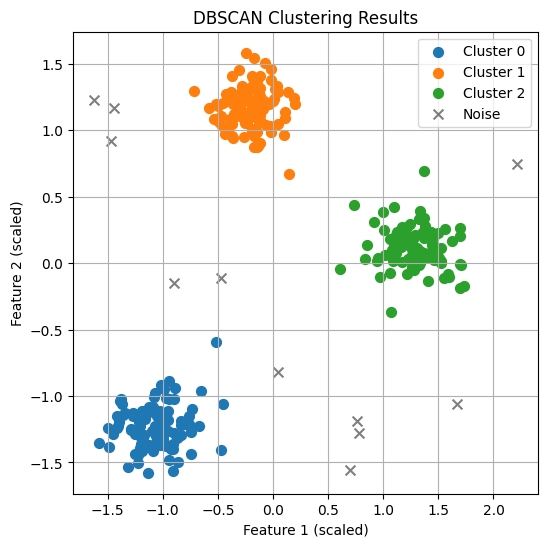

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate sample data with noise
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
# Add some random noise points far away
rng = np.random.RandomState(42)
noise = rng.uniform(low=-10, high=10, size=(20, 2))
X = np.vstack([X, noise])

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X_scaled)

# Plot DBSCAN results
plt.figure(figsize=(6, 6))
unique_labels = set(labels)
for k in unique_labels:
    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask]
    if k == -1:
        # Noise
        plt.scatter(xy[:, 0], xy[:, 1], c='k', marker='x', s=50, alpha=0.5, label='Noise')
    else:
        plt.scatter(xy[:, 0], xy[:, 1], marker='o', s=50, label=f'Cluster {k}')
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.grid(True)
plt.show()
